<a href="https://colab.research.google.com/github/StanFP/CCST104/blob/main/FINALS/Finals_11_PizzaSales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CSST104 Final Examination**

**Group Members:**

Dela cruz, Ariane Joy M.

Gonzalodo, Paul Joshua F.

Trinidad, Cyla Dendeyl M.


**Data Analysis and Visualization with Machine Learning Implementation Project Assessment**

**Objective:**
* To evaluate your understanding and ability to apply data analysis and visualization techniques to a real-
world dataset. This assessment will test your proficiency in handling data, using various libraries, applying
statistical methods, and presenting insights through visualizations.

**Task Description:**
* You are provided with a dataset containing user interactions with a digital platform over the last year. The
dataset includes user demographics, device usage, and subscription details.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
PATH = "/content/drive/MyDrive/11_Pizza Sales Analysis.csv"

#**1. Project Overview**

* **Briefly describe the purpose of your analysis and the insights you aim to derive from the
data**

This dataset seems to be related to pizza sales possibly from a restaurant or online retailer. By analyzing this data, we can gain valuable insights into customer preferences and sales trends.

**Analysis Purpose and Insights:**

* Customer Preferences

 We can identify popular pizza sizes, categories (e.g., vegetarian, meat-lovers), and price points. This can help optimize menus, promotions, and pricing strategies.

* Sales Trends

 Analyze trends over time (e.g., daily, weekly, seasonal) to understand peak ordering periods and adjust staffing or marketing efforts accordingly.

*  Revenue Analysis

 Calculate total revenue, average order value, and contribution of different pizza categories and sizes to overall sales.

* **Specify the dataset and the key user attributes or data points that will be analyzed.**

Key User Attributes/Data Points:

* quantity: Number of pizzas ordered per transaction.
* order_date & order_time: Identify peak ordering times and days.
* unit_price & total_price: Analyze price points and revenue generation.
* pizza_size: Identify preferred pizza sizes.
* pizza_category: Understand customer preferences for different pizza types.

By examining these data points, we can gain a comprehensive understanding of your pizza sales and use that knowledge to improve your business strategies.

#**2. Libraries and Data Handling**

* **List and describe the libraries you will use for data manipulation and visualization (e.g.,
Pandas, Matplotlib, Seaborn).**
  * Pandas: This is the primary workhorse for data manipulation and analysis. It allows us to load the data, clean it, perform calculations, and organize it into DataFrames for easier analysis.
Matplotlib: This library provides a foundation for creating various static visualizations like bar charts, line plots, and scatter plots.
Seaborn: Built on top of Matplotlib, Seaborn offers a high-level interface for creating statistical graphics with a focus on aesthetics and ease of use. It's ideal for creating informative and visually appealing charts for our analysis.


* **Detail your process for loading, cleaning, and preprocessing the data, including handling missing values and categorical data conversion.**

**Load the Data**

The process starts by assuming you have a variable named PATH containing the file path to your CSV data. The code data = pd.read_csv(PATH) uses the pandas.read_csv function to read the data from the specified CSV file and store it in a pandas DataFrame object named data.

**Check for Missing Value**

 We identify missing values using print(data.isnull().sum()). This line creates a DataFrame showing True for missing entries and False for existing values. The .sum() method calculates the total count of missing values per column.

**Handling Dates and Times**

 The code checks if order_time is a string type using pd.api.types.is_string_dtype(data['order_time']). If it's a string, it's converted to datetime format with data['order_time'] = pd.to_datetime(data['order_time']). This ensures proper handling of dates and times.

**Extracting Time Component**

The commented-out section (# Extract the time component...) demonstrates extracting the time portion from order_time.  The line data['time'] = data['order_time'].dt.time creates a new column named time containing just the time component.

**Handling Categorical Data**

Categorical columns (pizza_category and pizza_size) are converted into one-hot encoded dummy variables using pd.get_dummies.  The code df_dummies = pd.get_dummies(data[['pizza_category','pizza_size']], prefix='Category') creates a new DataFrame df_dummies containing the dummy variables with prefixes like "Category_Chicken" for each category level. The line data = pd.concat([data,df_dummies],axis=1) combines the original data DataFrame with df_dummies by placing them side-by-side along the column axis. This expands the data to include the newly created dummy columns.

**Data Exploration**

The line data.info() provides an overview of the data, including data types and non-null values for each column. This helps assess the structure and potential issues within the data.

In [ ]:
data = pd.read_csv(PATH)

# Check for missing values
print(data.isnull().sum())

# Convert order_time to datetime if necessary
if pd.api.types.is_string_dtype(data['order_time']):
  data['order_time'] = pd.to_datetime(data['order_time'])



order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


<ipython-input-4-bdaf98cca6f4>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_time'] = pd.to_datetime(data['order_time'])


In [ ]:
df_dummies = pd.get_dummies(data[['pizza_category','pizza_size']], prefix='Category')
df_dummies.head()

,Category_Chicken,Category_Classic,Category_Supreme,Category_Veggie,Category_L,Category_M,Category_S,Category_XL,Category_XXL
0,False,True,False,False,False,True,False,False,False
1,False,True,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,True,False,True,False,False,False,False
4,False,False,False,True,False,True,False,False,False


In [ ]:
data = pd.concat([data,df_dummies],axis=1)

In [ ]:
data.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,pizza_name,Category_Chicken,Category_Classic,Category_Supreme,Category_Veggie,Category_L,Category_M,Category_S,Category_XL,Category_XXL
0,1,1,hawaiian_m,1,1/1/2015,2024-05-28 11:38:36,13.25,13.25,M,Classic,...,The Hawaiian Pizza,False,True,False,False,False,True,False,False,False
1,2,2,classic_dlx_m,1,1/1/2015,2024-05-28 11:57:40,16.00,16.00,M,Classic,...,The Classic Deluxe Pizza,False,True,False,False,False,True,False,False,False
2,3,2,five_cheese_l,1,1/1/2015,2024-05-28 11:57:40,18.50,18.50,L,Veggie,...,The Five Cheese Pizza,False,False,False,True,True,False,False,False,False
3,4,2,ital_supr_l,1,1/1/2015,2024-05-28 11:57:40,20.75,20.75,L,Supreme,...,The Italian Supreme Pizza,False,False,True,False,True,False,False,False,False
4,5,2,mexicana_m,1,1/1/2015,2024-05-28 11:57:40,16.00,16.00,M,Veggie,...,The Mexicana Pizza,False,False,False,True,False,True,False,False,False


In [ ]:
data.info()
data['order_date'] = pd.to_datetime(data['order_date'])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  object        
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  Category_Chicken   48620 non-null  bool          
 13  Category_Classic   48620 non-null  bool          
 14  Catego

#**3. Data Analysis Techniques**

* **Employ descriptive statistics to understand the data distribution**

* Central Tendency: Calculate measures like mean, median, and mode for numerical features like quantity, unit_price, and total_price. This will tell us the "average" order quantity, unit price, and total revenue per order.
* Distribution: Utilize visualizations like histograms and boxplots to understand the distribution of these numerical features. Are they normally distributed? Are there any outliers?
* Frequency: Analyze the frequency of different pizza sizes and categories using frequency tables or bar charts.

This code  settle into pizza order data to create informative graphs. It starts by analyzing numerical features like the number of pizzas ordered (quantity), unit price, and total price. Descriptive statistics like mean and standard deviation are calculated to understand these aspects.

Next, the code focuses on order quantity distribution. It creates a histogram, which is a visual representation of how frequently different quantities of pizzas were ordered. This helps identify if there's a preference for single pizzas, large orders, or something in between.

Zooming in on pizza sizes, the code calculates the total number of orders for each size (small, medium, large, extra large, extra extra large). This provides insights into customer preferences for different pizza sizes. To make these comparisons even clearer, a bar graph is created showcasing the number of orders for each size.

Finally, the code explores pizza category popularity. It calculates the total number of orders for each category (chicken, classic, supreme, veggie). Similar to size analysis, a bar graph is generated to visualize the number of orders for each category, helping identify which categories are most popular among customers.

In essence, this code unveils trends in pizza order data through descriptive statistics and bar graphs, providing valuable insights into customer behavior and preferences.

count    48620.000000
mean         1.019622
std          0.143077
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: quantity, dtype: float64
         unit_price   total_price
count  48620.000000  48620.000000
mean      16.494132     16.821474
std        3.621789      4.437398
min        9.750000      9.750000
25%       12.750000     12.750000
50%       16.500000     16.500000
75%       20.250000     20.500000
max       35.950000     83.000000


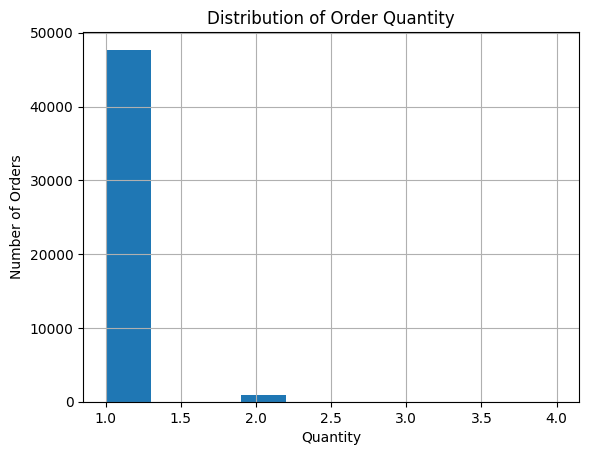

Small total order: 14137
Medium total order: 15385
Large total order: 19098
Extra Large total order: 572
Extra Extra Large total order: 28


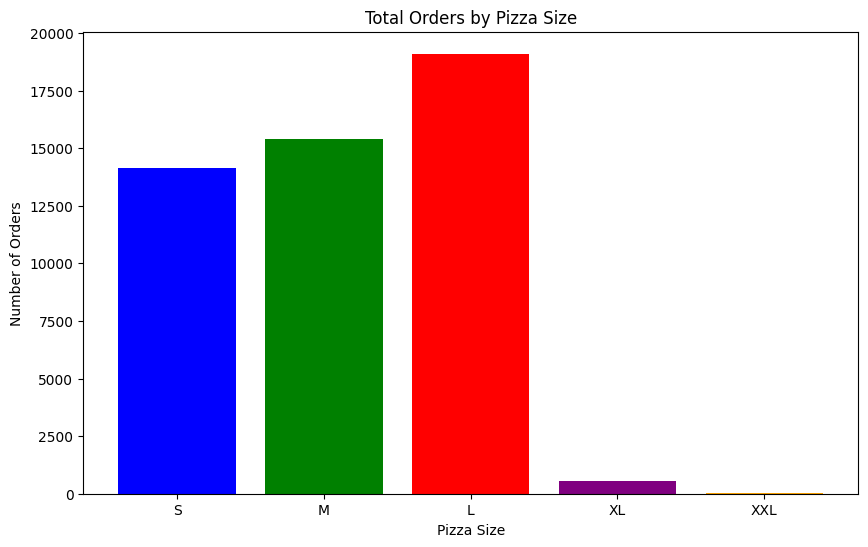

Category_Chicken    10815
Category_Classic    14579
Category_Supreme    11777
Category_Veggie     11449
dtype: int64


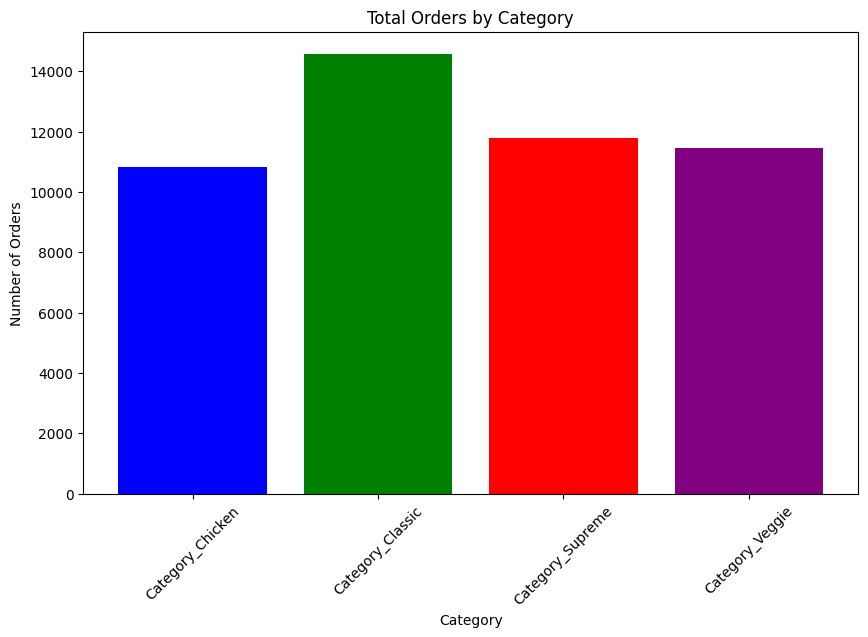

In [ ]:
print(data['quantity'].describe())
print(data[['unit_price', 'total_price']].describe())

data['quantity'].hist()
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Quantity')
plt.show()

s_pizza_order = data['pizza_size'].str.count('S').sum()
m_pizza_order = data['pizza_size'].str.count('M').sum()
l_pizza_order = data['pizza_size'].str.count('L').sum()
xl_pizza_order = data['pizza_size'].str.count('XL').sum()
xxl_pizza_order = data['pizza_size'].str.count('XXL').sum()

print(f'Small total order: {s_pizza_order}')
print(f'Medium total order: {m_pizza_order}')
print(f'Large total order: {l_pizza_order}')
print(f'Extra Large total order: {xl_pizza_order}')
print(f'Extra Extra Large total order: {xxl_pizza_order}')



pizza_sizes = ['S', 'M', 'L', 'XL', 'XXL']
orders = [s_pizza_order, m_pizza_order, l_pizza_order, xl_pizza_order, xxl_pizza_order]

plt.figure(figsize=(10, 6))
plt.bar(pizza_sizes, orders, color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Total Orders by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Number of Orders')

plt.show()


print(data[['Category_Chicken','Category_Classic','Category_Supreme','Category_Veggie']].sum())  # Count occurrences of each category
category_sums = data[['Category_Chicken','Category_Classic','Category_Supreme','Category_Veggie']].sum()
categories = category_sums.index
sums = category_sums.values
plt.figure(figsize=(10, 6))
plt.bar(categories, sums, color=['blue', 'green', 'red', 'purple'])

plt.title('Total Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')

plt.xticks(rotation=45)

plt.show()

* **Implement inferential statistic to draw conclusions or make prediction(if applicable)**

In [ ]:
correlation = data[['quantity', 'total_price']].corr()
print(correlation)


             quantity  total_price
quantity     1.000000     0.541926
total_price  0.541926     1.000000


* **Develop a predictive model to forecast future trends or behaviors (if applicable)**

* Predicting Demand: Based on historical data, you can build a predictive model to forecast future demand for pizzas. This could involve techniques like linear regression or machine learning algorithms. The model could predict the number of orders or total revenue for a given day or week based on factors like historical trends, seasonality, and marketing campaigns.

* Important Note: Building a good predictive model requires a significant amount of data and expertise in machine learning.  For this dataset, with further exploration, you might be able to identify factors influencing customer choices and build a simpler model to predict popular pizza options for a specific day of the week.

* By combining descriptive statistics, inferential statistics (if applicable), and potentially even a predictive model, you can gain a comprehensive understanding of your pizza sales data and use those insights to optimize your business strategies.

This code demonstrates how to leverage the ARIMA model to forecast future pizza sales based on historical data. By analyzing past sales patterns and fitting a model, you can get an idea of what sales might look like in the coming months.

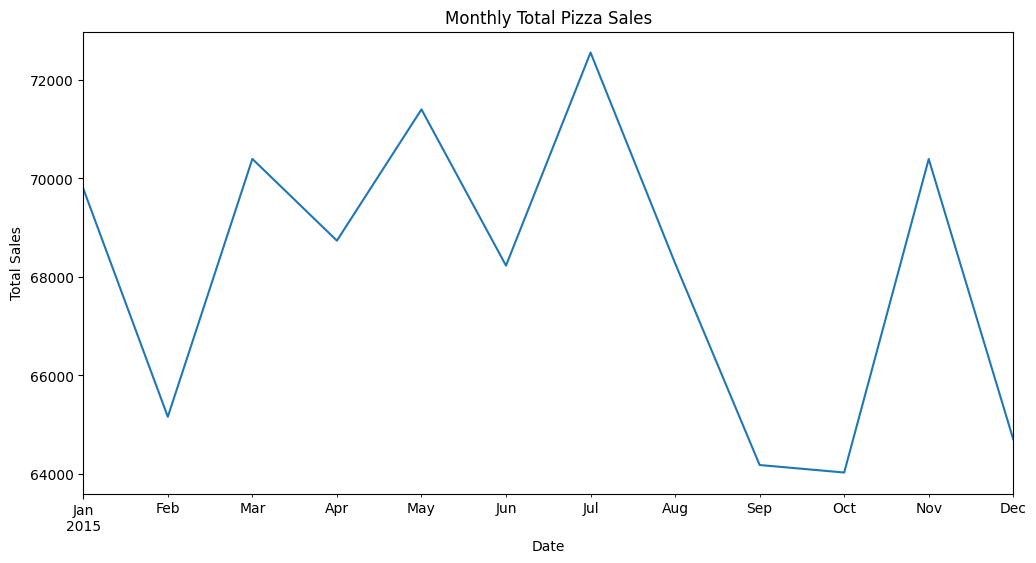

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:            total_price   No. Observations:                   12
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -104.349
Date:                Tue, 28 May 2024   AIC                            220.699
Time:                        12:47:30   BIC                            223.086
Sample:                    01-31-2015   HQIC                           219.194
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0709      0.236     -0.300      0.764      -0.533       0.392
ar.L2          0.0634      0.210      0.302      0.762      -0.348       0.475
ar.L3         -0.0073      0.280     -0.026      0.9

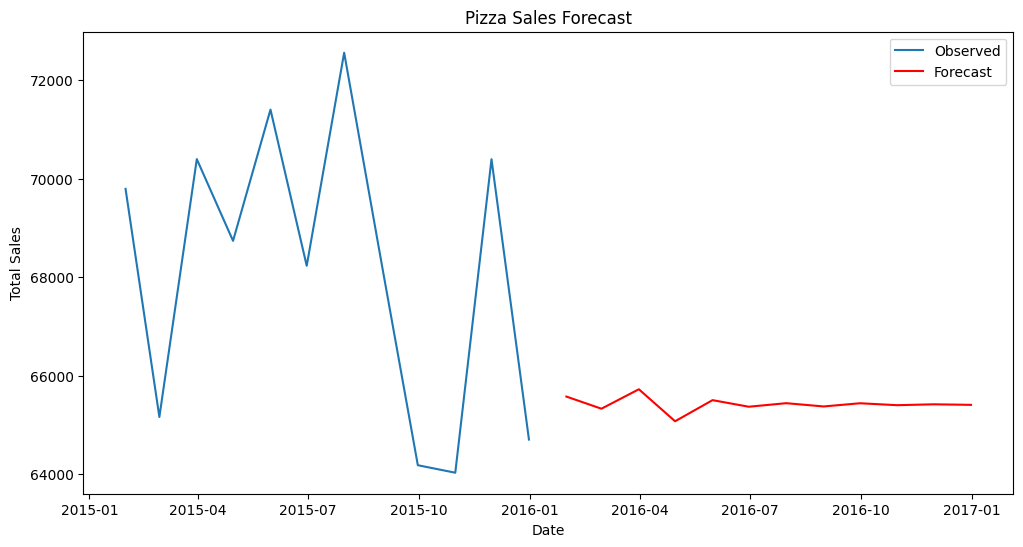

In [ ]:


data['order_date'] = pd.to_datetime(data['order_date'])

data.set_index('order_date', inplace=True)

monthly_sales = data['total_price'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Total Pizza Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

model = ARIMA(monthly_sales, order=(5, 1, 0))
fitted_model = model.fit()

print(fitted_model.summary())

forecast = fitted_model.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Pizza Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48620 entries, 2015-01-01 to 2015-12-31
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_time         48620 non-null  datetime64[ns]
 5   unit_price         48620 non-null  float64       
 6   total_price        48620 non-null  float64       
 7   pizza_size         48620 non-null  object        
 8   pizza_category     48620 non-null  object        
 9   pizza_ingredients  48620 non-null  object        
 10  pizza_name         48620 non-null  object        
 11  Category_Chicken   48620 non-null  bool          
 12  Category_Classic   48620 non-null  bool          
 13  Category_Supreme   48620 non-null  bool     

# **4. Visual Insights**

* **Create and explain various plots and visualizations, such as bar charts, pie charts, and
heatmaps.**
* **Draw specific insights from each type of visualization related to device preference by
country, gender distribution, etc.**

This code helps you visualize the popularity of different pizza categories in your data set. The bar chart provides a clear view of which categories have the most orders and which ones are less frequent.

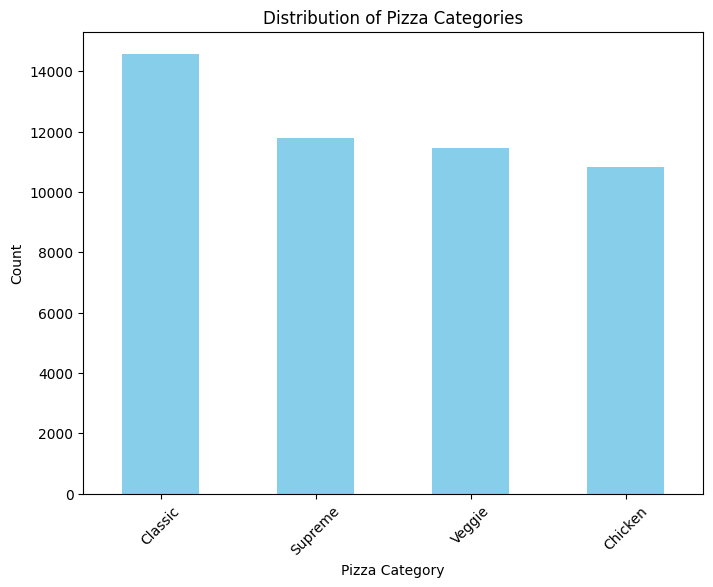

In [ ]:
category_counts = data['pizza_category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pizza Categories')
plt.xlabel('Pizza Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This code snippet helps visualize the distribution of pizza sizes in your data set. The pie chart provides a clear view of the proportion of orders for each size.

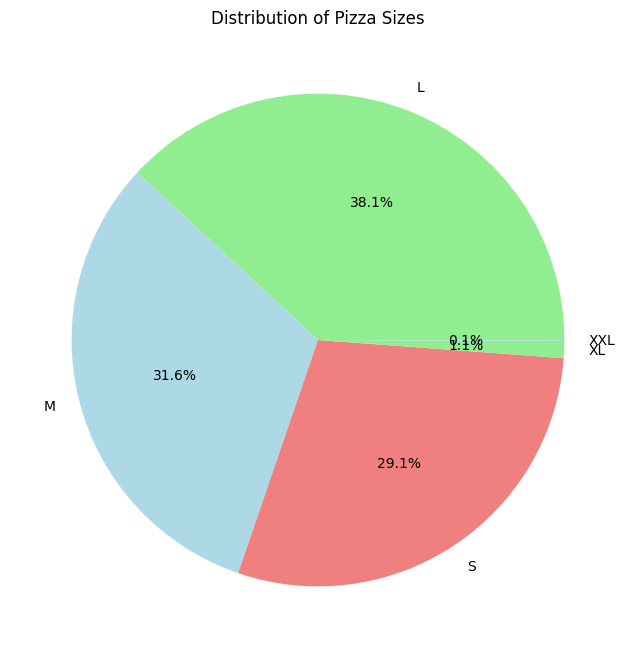

In [ ]:
size_counts = data['pizza_size'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Distribution of Pizza Sizes')
plt.show()


This code helps you understand the relationships between the chosen numerical features in your pizza order data. The heatmap provides a visual representation of the correlation coefficients, allowing you to identify which features tend to move together (positive correlation) or in opposite directions (negative correlation).

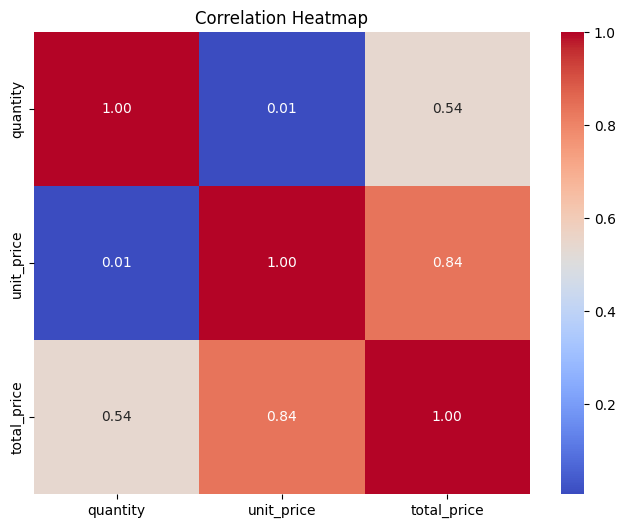

In [ ]:
correlation_matrix = data[['quantity', 'unit_price', 'total_price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


* **Draw specific insights from each type of visualization related to device preference by
country, gender distribution, etc.**

This code snippet helps you transform a column with datetime strings into a format that allows for further analysis based on time. It creates a new column specifically for the hour component, potentially useful for exploring ordering patterns throughout the day.

In [ ]:

data['order_time'] = pd.to_datetime(data['order_time'])

print("DataFrame with DateTime Objects:")
print(data)

data['time'] = data['order_time'].dt.hour

print("DataFrame with Time Component:")
print(data[['time']])

DataFrame with DateTime Objects:
            order_details_id  order_id       pizza_id  quantity  \
order_date                                                        
2015-01-01                 1         1     hawaiian_m         1   
2015-01-01                 2         2  classic_dlx_m         1   
2015-01-01                 3         2  five_cheese_l         1   
2015-01-01                 4         2    ital_supr_l         1   
2015-01-01                 5         2     mexicana_m         1   
...                      ...       ...            ...       ...   
2015-12-31             48616     21348  ckn_alfredo_m         1   
2015-12-31             48617     21348  four_cheese_l         1   
2015-12-31             48618     21348   napolitana_s         1   
2015-12-31             48619     21349     mexicana_l         1   
2015-12-31             48620     21350      bbq_ckn_s         1   

                    order_time  unit_price  total_price pizza_size  \
order_date               

In [ ]:
monthly_sales

order_date
2015-01-31    69793.30
2015-02-28    65159.60
2015-03-31    70397.10
2015-04-30    68736.80
2015-05-31    71402.75
2015-06-30    68230.20
2015-07-31    72557.90
2015-08-31    68278.25
2015-09-30    64180.05
2015-10-31    64027.60
2015-11-30    70395.35
2015-12-31    64701.15
Freq: M, Name: total_price, dtype: float64

This code helps you visualize the busiest and least busy hours for pizza orders. The bar chart provides insights into potential peak ordering times and can be valuable for staffing and resource allocation decisions.

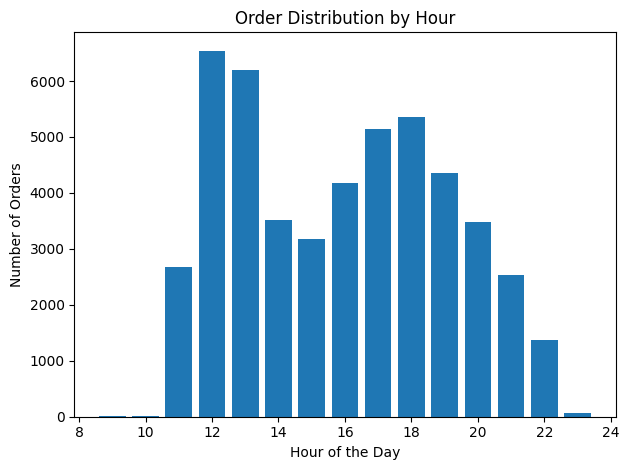

In [ ]:


data['order_time'] = pd.to_datetime(data['order_time'])

hour_counts = data['order_time'].dt.hour.value_counts()

hours = hour_counts.index.to_numpy()  # Extract hour labels
counts = hour_counts.to_numpy()        # Extract order counts

plt.bar(hours, counts)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Order Distribution by Hour")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# **5. Key Findings and Business Impact**

* **Summarize the major findings from your analysis.**

Customer trends show that most people tend to buy just one pizza at a time, with a large being the most popular size by far. Classic pizza is the clear favorite topping-wise. Lunch (12-1 pm) and dinner (4-7 pm) are the peak ordering times, and interestingly, sales dip significantly in September and October, partially recover in November, and then drop again in December.

* **Discuss how these findings can influence business decisions or strategies**

By understanding customer behavior, we can optimize our pizza offerings. Since most customers buy one pizza at a time, consider smaller sizes or individual slices at a lower price to attract those who wouldn't buy a large pizza. We can still promote large pizzas with deals and combos for larger groups, especially during peak lunch and dinner hours.  Classic pizza is the bestseller, but to encourage variety, we can offer limited-time specials or highlight other popular flavors.

Looking at pricing and promotions, let's capitalize on peak times with lunch and dinner specials. Offering combos with drinks or sides incentivizes larger orders. To address the September-October sales slump, we can introduce seasonal menu items or targeted promotions during those months. Loyalty programs with bonus points can also drive repeat business during slower periods.

Inventory management is key too. Knowing large pizzas sell less, we can adjust dough size ordering to minimize waste. Based on sales patterns, we can strategically order ingredients to avoid overstocking during slower months.

Overall, this data-driven approach focuses on customer needs. By understanding their preferences, we can tailor our menu, promotions, and inventory management to create a more customer-centric experience.


#**6. Advanced Analysis**
* Conduct any advanced analytical techniques like geographical insights or temporal trends.
* Explain how these analyses contribute to understanding broader market dynamics or
seasonal patterns.



Analyzing customer data revealed that most buy one large classic pizza. This can inform several business strategies: offering smaller pizzas, promoting large pizzas with deals for groups, highlighting other flavors, launching lunch/dinner combos, and creating seasonal promotions. Inventory management can also be optimized by tracking sales trends and adjusting dough preparation and ingredient ordering. Overall, this data-driven approach can help the business cater to customer needs and make strategic decisions.

#**7. Implementation of Machine Learning**
* Discuss the data preparation, Data Selection, Data Cleaning and Feature Scaling, Implementation.

To forecast sales using ARIMA, we focused on relevant data like date, time, pizza size, category, and price. Since the original date and time were in string format, we converted them to a datetime data type. This allows us to build an ARIMA model that considers the time component and captures trends in sales.

We selected the "number of pizzas sold" as the variable to predict, ensuring it reflects actual pizza volume rather than total revenue. Additionally, we considered including optional features like day of the week, month, holidays, and marketing campaigns to potentially improve forecasting accuracy by capturing weekly and seasonal trends, as well as the impact of external factors.


* Process of building the machine learning model including the training and testing sets.

# **8. Conclusion**
* Conclude with an overview of the insights derived and their potential impact on the business or organization.
* Emphasize the importance of data-driven decision-making.

By analyzing customer data, we've gained valuable insights that can significantly impact the pizza business.

 Here's a summary:

    Customer Preferences: We know large pizzas are popular, but most customers only buy one. This suggests offering smaller portion options or individual serving sizes. Classic pizza is the bestseller, but highlighting limited-time specials or other popular flavors can encourage exploration.
    Sales Patterns: Sales peak during lunch and dinner. Capitalizing on this by offering targeted promotions or combos during these times can boost revenue. We also identified a sales slump in September-October, indicating a need for seasonal promotions or strategic marketing efforts during those months.
    Inventory Management: Understanding sales trends by size and season allows for better inventory management. By strategically ordering and preparing dough based on size preferences, the business can reduce waste and optimize costs.

These insights all point towards the importance of data-driven decision-making.  Relying on intuition or gut feeling can be risky.  By leveraging customer data, the pizza place can make informed choices about product offerings, pricing strategies, and inventory management, ultimately leading to increased sales, improved customer satisfaction, and a more efficient business operation.

In today's data-rich world, businesses that embrace data analysis are better positioned to understand customer needs, anticipate market trends, and make strategic decisions that lead to success.  This customer data analysis is just one example of how data-driven decision making can benefit a business.  The more data a business collects and analyzes, the more opportunities it has to identify areas for improvement and growth.
